# Lead Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

We have to Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# Step 1 : Importing Libraries & Dataset

In [1]:
#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data display costomization
pd.set_option('display.max_columns', 40)

In [4]:
# Load Dataset 
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting Dataset

In [5]:
# Checking dimensions of dataframe
lead_df.shape

(9240, 37)

There are 9240 rows and 37 columns

In [6]:
#Statistical analysis of dataframe
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


There are only 7 numerical columns.

In [7]:
#Checking info about columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Oops!! There is lot of missing data.

In [8]:
#Checking dulplicates

sum(lead_df.duplicated(subset='Prospect ID'))

0

In [9]:
sum(lead_df.duplicated(subset='Lead Number'))

0

Prospect ID and Lead Number are just iterative values and all are unique. So we can drop these columns.

In [10]:
lead_df.drop(['Prospect ID','Lead Number'],axis = 1, inplace = True)

In [11]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
lead_df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [13]:
# Let's check percentage of missing data
round(100*(lead_df.isnull().sum()/lead_df.shape[0]), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Lead Quality has almost 52% missing data and Tags has 36.3% missing data

We can drop columns having null values gretaer than 3000.

In [14]:
for i in lead_df.columns:
  if lead_df[i].isnull().sum() > 3000:
    lead_df.drop(i,1,inplace = True)

In [15]:
lead_df.isnull().sum().sort_values(ascending = False)

Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Last Notable Activity                               0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
Search                                              0
A free copy of Mastering The Interview              0
Magazine                    

In [16]:
# Dropping 'City' and 'Country'
lead_df.drop(['City','Country'],axis = 1, inplace = True)

In [17]:
# Getting all value_counts for categorical columns
for i in lead_df:
  print(i)
  print(lead_df[i].astype('category').value_counts())
  print("\n\n=============================\n\n")


Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64




Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64




Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64




Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64




Converted
0    5679
1    3561
Name: Converted, dtype

In 'Lead Profile' 4146 rows and in 'How did you hear about X Education' 5043 rows are 'Select' 

Which are almost 63 % of rows in 'Lead Profile' and 72% of rows in 'How did you hear about X Education' and of no use.

In Specialization there are only 24 % rows are 'Select'. We can deal with this by just dropping rows which contain 'Select'

Select values are good as null.

In [18]:
lead_df.drop(['How did you hear about X Education','Lead Profile'],axis = 1, inplace = True)

Select option means customer has not selected any of the options. Select values are as good as NULL.

**'Select' values are in most numbers in Lead Profile, How did you hear about X Education, Specialization and many other columns.**

In [19]:
lead_df['Specialization'] = lead_df['Specialization'].replace('Select', np.nan)

***Most of the columns are not adding any information to the model. We can drop those columns from dataframe.***

In [20]:
# These columns are not giving much information and are biased. 
#dropping these columns
lead_df.drop(['What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
           'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
           'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview'],axis = 1,inplace = True)

In [21]:
#Checking percentage of null values again after converting select to nan
round(100*(lead_df.isnull().sum()/lead_df.shape[0]), 2)

Lead Origin                         0.00
Lead Source                         0.39
Do Not Email                        0.00
Do Not Call                         0.00
Converted                           0.00
TotalVisits                         1.48
Total Time Spent on Website         0.00
Page Views Per Visit                1.48
Last Activity                       1.11
Specialization                     36.58
What is your current occupation    29.11
Last Notable Activity               0.00
dtype: float64

**Checking null values on each columns**

In [22]:
# Occupation

lead_df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [23]:
# Let's check the percentage of values in Occupation column to impute null values

diff = (lead_df.shape[0] - lead_df['What is your current occupation'].isnull().sum())
(lead_df['What is your current occupation'].value_counts() / diff)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

**85% of the values are listed as "Unemployed". So NaN values can be imputed as unemployed. But we are just deleting the null rows.** 

In [24]:
lead_df.dropna(inplace=True)

In [25]:
#Checking percentage of null values again
round(100*(lead_df.isnull().sum()/lead_df.shape[0]), 2).sort_values(ascending = False)

Last Notable Activity              0.0
What is your current occupation    0.0
Specialization                     0.0
Last Activity                      0.0
Page Views Per Visit               0.0
Total Time Spent on Website        0.0
TotalVisits                        0.0
Converted                          0.0
Do Not Call                        0.0
Do Not Email                       0.0
Lead Source                        0.0
Lead Origin                        0.0
dtype: float64

Now data is clean, we can start analysis.

# Step 2: Exploratory Data Analysis

## Univariate Analysis (Categorical)

#### Converted
Converted is the target variable so our EDA will be on all the features with converted variable.

It indicates whether a lead has been successfully converted (1) or not (0).

In [26]:
round(100*(lead_df.Converted.sum()/lead_df.shape[0]),2)

51.07

Only 51% leads are converted.

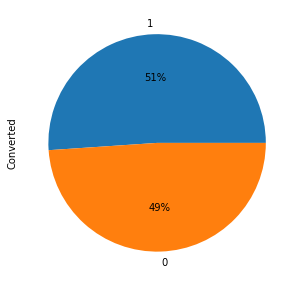

In [27]:
# pie chart of Converted
plt.figure(figsize=(5,5))
lead_df.Converted.value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.show()

In [28]:
# Count plot for each categorical feature w.r.t Converted
def counts(col):
    plt.figure(figsize=[10,5])
    ax = sns.countplot(x=col,data=lead_df,hue="Converted",palette="husl",hue_order=[0,1])
    plt.xlabel(col)
    plt.ylabel('Total count')
    plt.legend(loc='upper center', bbox_to_anchor=(1, 0.8), ncol=1)
    plt.xticks(rotation=65, horizontalalignment='right',fontweight='light')
    return plt.show()

#### Lead Origin
The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.

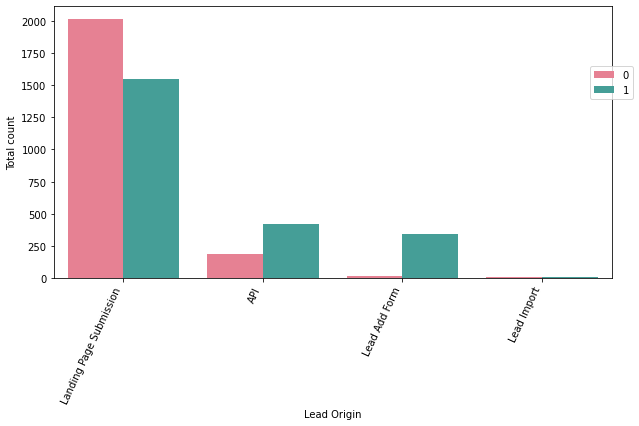

In [29]:
# Converted and Lead Origin
counts('Lead Origin')

Inference:

- API and Landing Page Submission have 27 - 35% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more conversion rate but count of lead are not very high.
- Lead Import are very less in count.

 ***To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.***

#### Lead Source
The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

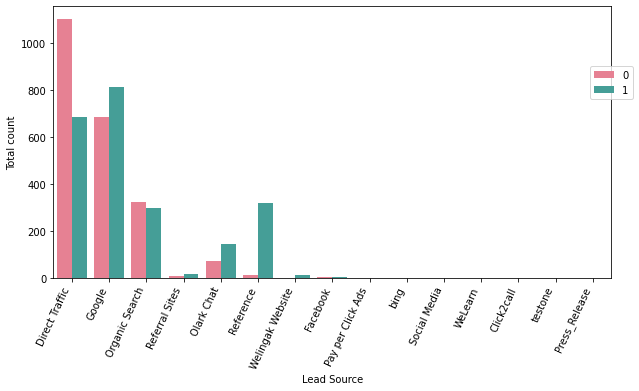

In [30]:
# Converted and Lead Source
counts('Lead Source')

- We can combine low frequency values

- We can convert last columns such as:-> 'blog', 'Pay per Click Ads','bing','Social Media','WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM' to a single column -> 'Others'

- There are two variables Google and google just case difference.

In [31]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google', 'Google')

In [32]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing', 'Social Media', 'WeLearn',
                                                    'Click2call', 'Live Chat',
                                                    'testone', 'Press_Release','Pay per Click Ads'], 'Others')

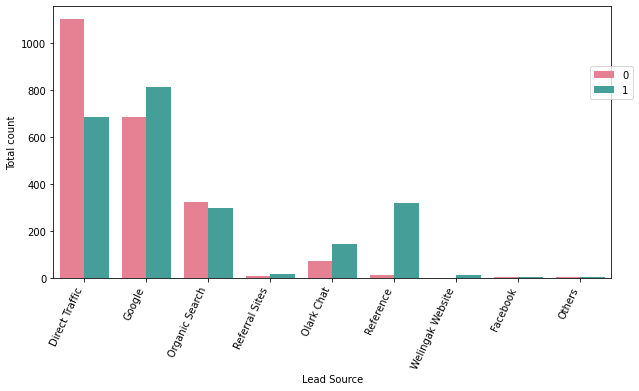

In [33]:
counts('Lead Source')

Now, it looks nice.

Inference:

- Google and Direct traffic generates maximum number of leads. But count is less as compared to not converted leads.
- Reference leads have also high conversion rate and leads through welingak website is high.

***To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.***

#### Do Not Email & Do Not Call
- Do Not Email: An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.

- Do Not Call: An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.

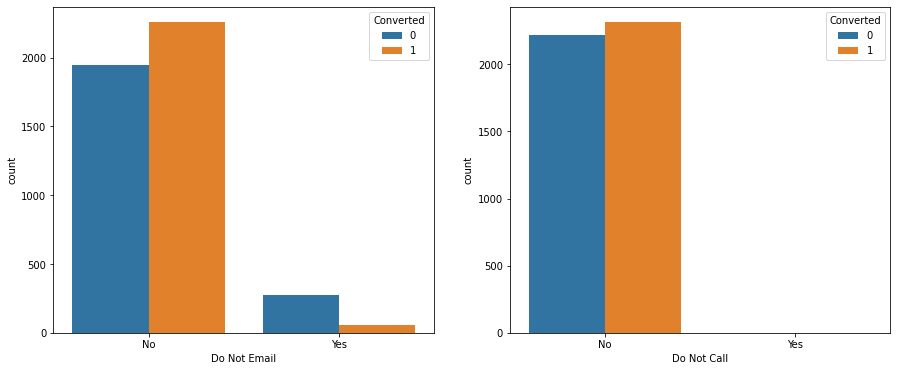

In [34]:
# Do not Email and Do not call

fig, axs = plt.subplots(1,2, figsize=(15,6))
sns.countplot(x="Do Not Email", hue='Converted', data=lead_df, ax=axs[0])
sns.countplot(x="Do Not Call", hue='Converted', data=lead_df, ax=axs[1])

In [35]:
# As Do Not Call is biased variable with only one value. So, dropping it
lead_df.drop('Do Not Call',axis = 1,inplace = True)

#### Last Activity
Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.

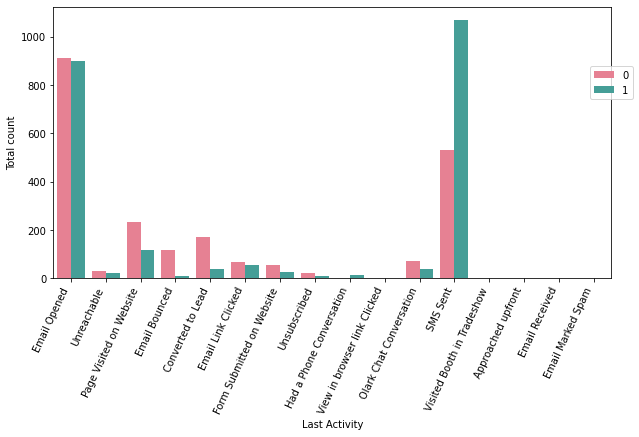

In [36]:
# Last Activity
counts('Last Activity')

In [37]:
# Let's keep considerable last activities and club all others to "Other_Activity"

lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                        'Visited Booth in Tradeshow', 'Approached upfront',
                                                        'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'Other activities')

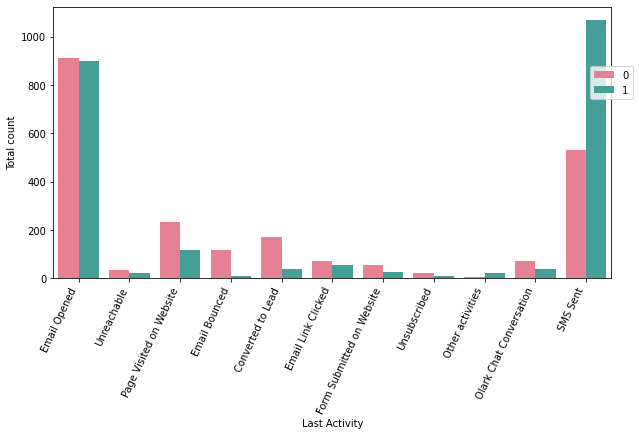

In [38]:
# plotting again 'Last Activity'

counts('Last Activity')

Inference:

- Most of the leads have their Email opened as their last activity.
- Conversion rate for leads with last activity as SMS Sent.

***To improve overall lead conversion rate, focus should be on improving Emails content, Website, Olark chat conversation.***

#### Specialization
The industry domain in which the customer worked before.

In [39]:
# Specialisation

lead_df.Specialization.describe()

count                   4535
unique                    18
top       Finance Management
freq                     745
Name: Specialization, dtype: object

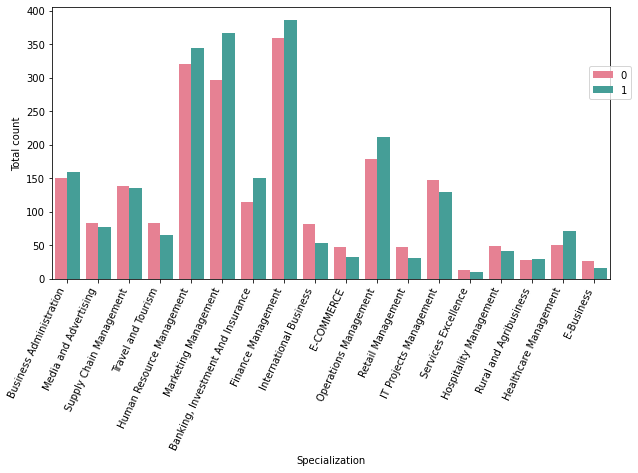

In [40]:
# countplot for Specialization
counts('Specialization')

Inference:

- Focus should be more on the Specialization with high conversion rate like Finance Management, Human Resource Management, Marketing Management, Operations Management.

#### What is your current occupation
It Indicates whether the customer is a student, umemployed or employed.

In [41]:
lead_df['What is your current occupation'].describe()

count           4535
unique             6
top       Unemployed
freq            3738
Name: What is your current occupation, dtype: object

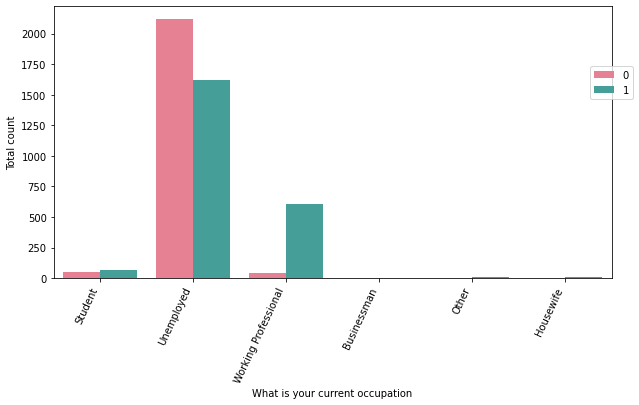

In [42]:
# Countplot for What is your current occupation

counts('What is your current occupation')

Inferences:-
1. Working professionals who are going with the course have high chances of joining it
2. Unemployed leads are most in numbers and conversion count is also higher.

#### Last Notable Activity
The last notable acitivity performed by the student.

In [43]:
lead_df['Last Notable Activity'].describe()

count             4535
unique              14
top       Email Opened
freq              1531
Name: Last Notable Activity, dtype: object

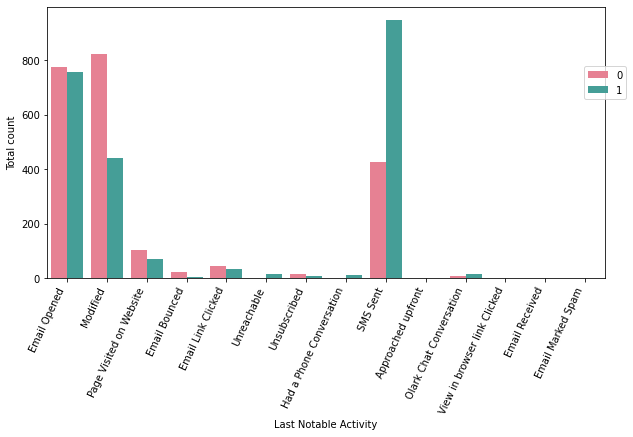

In [44]:
# Countplot for Last Notable Activity

counts('Last Notable Activity')

In [45]:
lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                        'Visited Booth in Tradeshow', 'Approached upfront',
                                                        'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'Other_notable_activities')

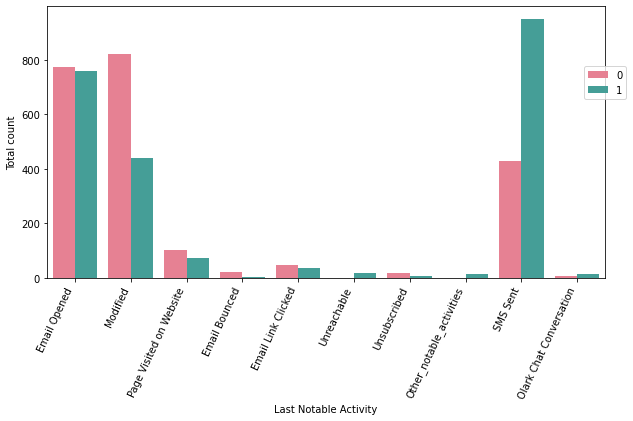

In [46]:
#plotting again
counts('Last Notable Activity')

Inference:-
- If last notable activity of student leads is SMS, then they are most likely to be converted.
- Most of the student leads have modified as last activity.

## Univariate Analysis(Numerical)

In [47]:
def outliers_check(col):
  plt.figure(figsize=[10,5])
  sns.boxplot(y=col,data=lead_df)
  return plt.show() 

In [48]:
def box_draw(col):
  plt.figure(figsize=[10,5])
  sns.boxplot(x = 'Converted',y = col, data = lead_df)
  return plt.show()

#### Total Visits
The total number of visits made by the customer on the website.

In [49]:
# Total Visits
lead_df['TotalVisits'].describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99])

count    4535.000000
mean        4.293716
std         5.451975
min         0.000000
5%          0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        19.000000
max       251.000000
Name: TotalVisits, dtype: float64

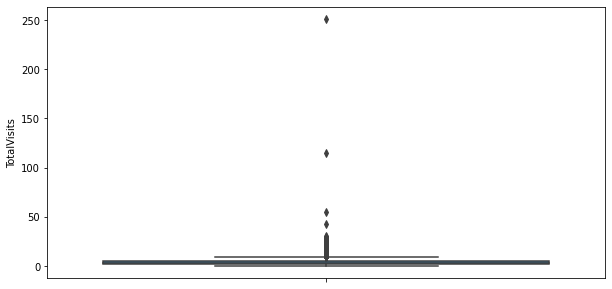

In [50]:
outliers_check('TotalVisits')

- As we can see there are so many outliers.
- So, We will cap the outliers to 95% value for analysis.

In [51]:
set_percentiles = lead_df['TotalVisits'].quantile([0.05, 0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <=set_percentiles[0]] = set_percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >=set_percentiles[1]] = set_percentiles[1]

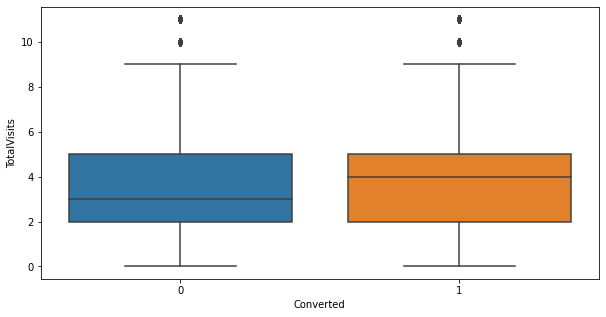

In [52]:
# Boxplot after capping the outliers
box_draw('TotalVisits')

Inference:

- Median for converted is more than not converted leads.

**Therefore, We can conclude from this variable that number of total visits increases than leads will also increase.**

#### Total Time Spent On Website
The total time spent by the customer on the website.

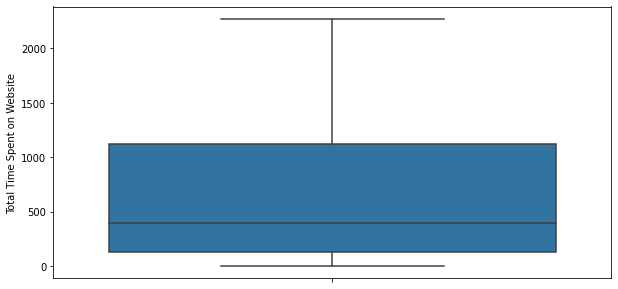

In [53]:
# Boxplot to check the outliers
outliers_check('Total Time Spent on Website')

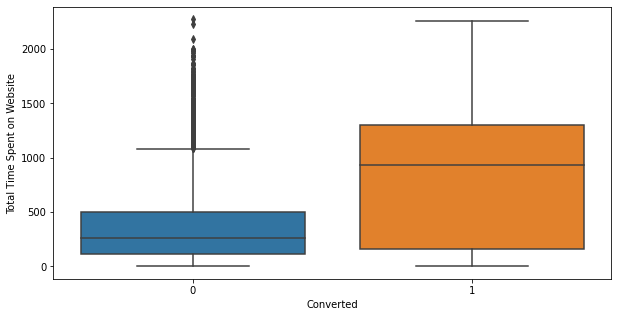

In [54]:
# Boxplot Converted vs Total Time Spent on Website
box_draw('Total Time Spent on Website')

Inference:

- Leads spend more time on the website are more likely to be converted.

***Website should be more engaging to make leads spend more time***

#### Page Views Per Visit
Average number of pages on the website viewed during the visits.

In [55]:
lead_df['Page Views Per Visit'].describe()

count    4535.000000
mean        2.937385
std         2.143495
min         0.000000
25%         2.000000
50%         2.670000
75%         4.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [56]:
#Checking the percentiles

lead_df['Page Views Per Visit'].describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99])

count    4535.000000
mean        2.937385
std         2.143495
min         0.000000
5%          0.000000
25%         2.000000
50%         2.670000
75%         4.000000
90%         5.000000
95%         6.551000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

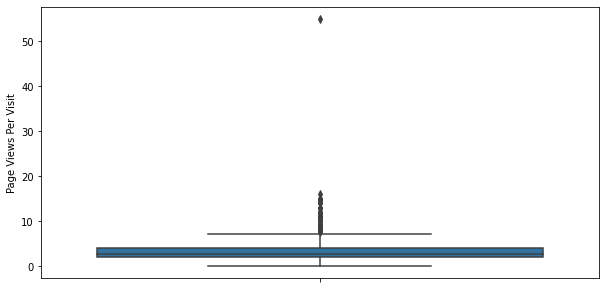

In [57]:
outliers_check('Page Views Per Visit')

- As we can see there are a number of outliers in the data.
- We will cap the outliers to 95% value for analysis.

In [58]:
set_percentiles = lead_df['Page Views Per Visit'].quantile([0.05, 0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <=set_percentiles[0]] = set_percentiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >=set_percentiles[1]] = set_percentiles[1]

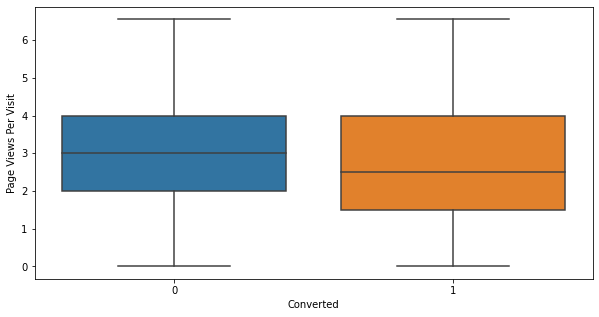

In [59]:
box_draw('Page Views Per Visit')

Inference:

- Median for not converted leads is more.
- Total Number of leads converted have visited all the pages.

**Nothing can be said specifically for lead conversion from Page Views Per Visit**

# Step 3 : Data Preparation

#### Converting binary variables yes/no to 1/0

In [60]:
l1 = ['Do Not Email']

In [61]:
def binary_map(x):
    return x.map({'Yes':1, "No":0})

In [62]:
# Applying binary_map function in columns

lead_df[l1] = lead_df[l1].apply(binary_map)

In [63]:
# Checking data after converting
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.000,Email Opened,Business Administration,Student,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.000,Unreachable,Media and Advertising,Unemployed,Modified
6,Landing Page Submission,Google,0,1,2.0,1640,2.000,Email Opened,Supply Chain Management,Unemployed,Modified
10,Landing Page Submission,Organic Search,0,1,8.0,1351,6.551,Email Opened,Travel and Tourism,Unemployed,Email Opened
11,Landing Page Submission,Direct Traffic,0,1,8.0,1343,2.670,Page Visited on Website,Human Resource Management,Unemployed,Page Visited on Website


#### Dummy Variable
For categorical variables, we can create dummy variables

In [64]:
dummy1 = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation','Last Notable Activity']], drop_first=True)

In [65]:
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_notable_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
10,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [66]:
# Concatenating dummy dataframe with master dataframe

lead_df = pd.concat([lead_df, dummy1], axis=1)

In [67]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_notable_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.000,Email Opened,Business Administration,Student,Email Opened,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.000,Unreachable,Media and Advertising,Unemployed,Modified,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
6,Landing Page Submission,Google,0,1,2.0,1640,2.000,Email Opened,Supply Chain Management,Unemployed,Modified,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
10,Landing Page Submission,Organic Search,0,1,8.0,1351,6.551,Email Opened,Travel and Tourism,Unemployed,Email Opened,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
11,Landing Page Submission,Direct Traffic,0,1,8.0,1343,2.670,Page Visited on Website,Human Resource Management,Unemployed,Page Visited on Website,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [68]:
# Dropping initial columns whose dummies are created

lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation','Last Notable Activity'], axis=1,inplace=True)

In [69]:
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_notable_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2,0,1,2.0,1532,2.000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
6,0,1,2.0,1640,2.000,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
10,0,1,8.0,1351,6.551,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
11,0,1,8.0,1343,2.670,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [70]:
from sklearn.model_selection import train_test_split

#Putting feature variable to X

X = lead_df.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_notable_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2,0,2.0,1532,2.000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
6,0,2.0,1640,2.000,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
10,0,8.0,1351,6.551,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
11,0,8.0,1343,2.670,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [71]:
# Putting response variable in y

y = lead_df['Converted']

y.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [72]:
# Splitting the data into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_notable_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2006,0,2.502120,-0.648184,2.149049,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
5140,0,0.356190,-1.076675,-0.686815,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
7588,0,-0.001465,-1.044935,0.666917,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5244,0,0.713845,-0.819228,0.085916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8663,1,2.502120,-0.762801,0.475186,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [75]:
# Checking the churn rate

Converted = round(100*(lead_df['Converted'].sum()/lead_df.shape[0]),2)

Converted

51.07

We have 51% conversion

#### Correlation Matrix

In [76]:
lead_df.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_notable_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Do Not Email,1.000000,-0.188306,-0.007020,-0.076373,0.014878,0.080331,-0.056210,-0.015615,-0.015615,-0.078819,-0.023187,0.050553,0.002049,-0.052827,-0.000472,-0.016164,0.574113,-0.031452,-0.223492,-0.018638,...,-0.019747,0.021562,0.028417,0.047804,-0.010910,0.052905,-0.012513,-0.000334,-0.025416,0.076111,-0.068410,-0.031439,-0.196733,0.113452,-0.020034,0.010532,0.057736,-0.008038,-0.018200,0.270623
Converted,-0.188306,1.000000,-0.013225,0.336092,-0.111066,-0.290469,0.261333,-0.001191,-0.001191,0.044894,0.070635,-0.024555,-0.001102,0.254783,0.032101,0.056388,-0.147750,-0.025226,-0.023741,-0.051178,...,0.019359,-0.029973,0.001491,-0.010529,-0.008208,-0.024977,0.043649,0.014712,0.016987,-0.333762,0.346325,-0.021203,-0.022269,-0.200832,0.020207,0.052825,-0.038558,0.235889,0.056661,-0.024995
TotalVisits,-0.007020,-0.013225,1.000000,0.235518,0.662902,0.312417,-0.377119,-0.067444,-0.067444,0.137230,-0.192269,0.307064,-0.012022,-0.371743,0.062061,-0.058350,-0.080177,-0.011026,0.027500,-0.013188,...,-0.031425,0.000372,0.029524,0.016037,0.009553,0.090369,-0.024452,0.036774,-0.031048,0.108936,-0.108987,0.013947,0.047443,-0.125900,0.048595,0.041084,0.185432,-0.019222,-0.005866,0.006423
Total Time Spent on Website,-0.076373,0.336092,0.235518,1.000000,0.225557,0.159267,-0.262763,-0.060856,-0.060856,0.163565,-0.141674,0.049282,-0.014127,-0.260831,0.013333,-0.031157,-0.055174,-0.038925,-0.003169,-0.015392,...,0.011390,0.008188,0.003868,-0.008198,0.013160,0.015237,-0.001907,0.031302,-0.014224,-0.033354,0.038442,-0.029860,0.002889,-0.095031,0.040574,0.024459,0.014300,0.084730,-0.002818,0.001274
Page Views Per Visit,0.014878,-0.111066,0.662902,0.225557,1.000000,0.448662,-0.446228,-0.076470,-0.076470,0.195361,-0.286443,0.298484,-0.011209,-0.435982,0.055756,-0.077531,-0.056687,-0.033523,0.034984,-0.035812,...,-0.028496,0.002319,0.011040,0.001540,0.010992,0.102151,-0.025899,0.013332,-0.028876,0.143194,-0.142411,-0.020494,0.047123,-0.089173,-0.008684,0.009714,-0.021848,0.050037,0.008703,0.033565
Lead Origin_Landing Page Submission,0.080331,-0.290469,0.312417,0.159267,0.448662,1.000000,-0.556615,-0.106612,-0.106612,0.066252,-0.429485,0.069320,-0.025434,-0.538454,-0.034345,-0.110366,0.064893,-0.017965,-0.020259,-0.014842,...,-0.023522,0.031839,0.011570,0.017082,0.026759,0.038909,-0.025039,-0.019403,-0.013651,0.237777,-0.240499,-0.002666,-0.000220,-0.003604,-0.038408,-0.029556,0.024169,0.003982,-0.041045,0.018276
Lead Origin_Lead Add Form,-0.056210,0.261333,-0.377119,-0.262763,-0.446228,-0.556615,1.000000,-0.016167,-0.016167,-0.202909,-0.061275,-0.115942,0.049120,0.967373,-0.022900,0.198281,-0.048914,0.032037,0.016994,-0.014323,...,-0.013005,-0.025774,-0.018419,-0.010515,-0.032435,-0.048932,0.042525,-0.016167

# Step 4: Model Building

#### Feature Selection using RFE

As we can see that there are a lot of variables present in the dataset which we cannot deal with. So best way to approach this is to select a small set of features from this pool of variables using RFE.

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [78]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 15)  # running RFE with 15 variables as output

rfe = rfe.fit(X_train, y_train)

In [79]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False,  True, False,  True, False, False,
        True, False])

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 27),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Others', False, 40),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 25),
 ('Last Activity_Email Link Clicked', False, 38),
 ('Last Activity_Email Opened', False, 6),
 ('Last Activity_Form Submitted on Website', False, 8),
 ('Last Activity_Olark Chat Conversation', False, 23),
 ('Last Activity_Other activities', True, 1),
 ('Last Activity_Page Visited on Website', False, 10),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreacha

In [81]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Other activities',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Other_notable_activities',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [82]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_

####Functions used in Model Building

In [83]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def check_VIF(col):
  vif = pd.DataFrame()
  vif['Features'] = X_train[col].columns
  vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return vif

#### Building The Model Using Stats Models

In [85]:
import statsmodels.api as sm

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3158
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1424.0
Date:                Tue, 07 Sep 2021   Deviance:                       2848.0
Time:                        11:25:51   Pearson chi2:                 3.62e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0031      0.296      3.394      0.001       0.424       1.582
Do Not Email                                            -1.5322      0.230     -6.671      0.000      -1.982      -1.082
Total Time Spent on Website                              1.0921      0.052     20.823      0.000       0.989       1.195
Lead Origin_Landing Page Submission                     -0.9706      0.176     -5.528      0.000      -1.315      -0.626
Lead Origin_Lead Add Form                                0.0781      1.296      0.060      0.952      -2.462       2.618
Lead Source_Olark Chat                                   0.9471      0.267      3.541      0.000       0.423       1.471
Lead Source_Reference                                    3.1943      1.336      2.391      0.017       0.575       5.813
Lead Source_Welingak Website                            23.1547   1.54e+04      0.002      0.999   -3.02e+04    3.02e+04
Last Activity_Other activities                           1.2874      0.860      1.496      0.135      -0.399       2.974
Last Activity_SMS Sent                                   0.9677      0.101      9.609      0.000       0.770       1.165
What is your current occupation_Housewife               22.1494   1.65e+04      0.001      0.999   -3.23e+04    3.24e+04
What is your current occupation_Unemployed              -0.7240      0.249     -2.912      0.004      -1.211      -0.237
What is your current occupation_Working Professional     1.9566      0.319      6.138      0.000       1.332       2.581
Last Notable Activity_Modified                          -0.7261      0.110     -6.608      0.000      -0.941      -0.511
Last Notable Activity_Other_notable_activities           1.1739      1.417      0.829      0.407      -1.603       3.950
Last Notable Activity_Unreachable                        2.7515      1.110      2.480      0.013       0.577       4.926
========================================================================================================================
"""

There are quite a few variables which have a p-value greater than 0.05. We will need to take care of them. But, first also loook at the VIFs.

In [87]:
check_VIF(col)

,Features,VIF
3,Lead Origin_Lead Add Form,77.62
5,Lead Source_Reference,74.40
10,What is your current occupation_Unemployed,8.53
2,Lead Origin_Landing Page Submission,7.91
6,Lead Source_Welingak Website,4.01
11,What is your current occupation_Working Profes...,2.28
7,Last Activity_Other activities,1.94
13,Last Notable Activity_Other_notable_activities,1.93
8,Last Activity_SMS Sent,1.66
12,Last Notable Activity_Modified,1.47


VIF and p-values for some variables are very high

Will drop Lead Source_Reference first

In [88]:
# We can drop Lead Source_Reference as its VIF is very high

col = col.drop('Lead Source_Reference', 1)

In [89]:
#building model again
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3159
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1426.9
Date:                Tue, 07 Sep 2021   Deviance:                       2853.9
Time:                        11:25:51   Pearson chi2:                 3.56e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0203      0.295      3.455      0.001       0.441       1.599
Do Not Email                                            -1.5286      0.229     -6.669      0.000      -1.978      -1.079
Total Time Spent on Website                              1.0913      0.052     20.809      0.000       0.989       1.194
Lead Origin_Landing Page Submission                     -0.9829      0.176     -5.585      0.000      -1.328      -0.638
Lead Origin_Lead Add Form                                3.0856      0.356      8.672      0.000       2.388       3.783
Lead Source_Olark Chat                                   0.9159      0.268      3.413      0.001       0.390       1.442
Lead Source_Welingak Website                            20.1347   1.54e+04      0.001      0.999   -3.02e+04    3.02e+04
Last Activity_Other activities                           1.2978      0.859      1.511      0.131      -0.385       2.981
Last Activity_SMS Sent                                   0.9721      0.101      9.664      0.000       0.775       1.169
What is your current occupation_Housewife               22.1481   1.65e+04      0.001      0.999   -3.24e+04    3.24e+04
What is your current occupation_Unemployed              -0.7315      0.248     -2.949      0.003      -1.218      -0.245
What is your current occupation_Working Professional     1.9535      0.318      6.138      0.000       1.330       2.577
Last Notable Activity_Modified                          -0.7243      0.110     -6.602      0.000      -0.939      -0.509
Last Notable Activity_Other_notable_activities           1.1607      1.416      0.820      0.412      -1.614       3.936
Last Notable Activity_Unreachable                        2.7551      1.109      2.484      0.013       0.581       4.929
========================================================================================================================
"""

In [90]:
check_VIF(col)

,Features,VIF
9,What is your current occupation_Unemployed,8.53
2,Lead Origin_Landing Page Submission,7.91
10,What is your current occupation_Working Profes...,2.27
6,Last Activity_Other activities,1.94
12,Last Notable Activity_Other_notable_activities,1.93
3,Lead Origin_Lead Add Form,1.80
7,Last Activity_SMS Sent,1.66
11,Last Notable Activity_Modified,1.47
4,Lead Source_Olark Chat,1.44
1,Total Time Spent on Website,1.15


Now, VIF comes under 10

But Lead Source_Welingak Website and What is your current occupation_Housewife has high p-value and are insignificant

Will drop them next one by one

In [91]:
# Dropping 'Lead Source_Welingak Website'

col = col.drop('Lead Source_Welingak Website', 1)

In [92]:
# Accessing the model iteration 3rd
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3160
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1427.7
Date:                Tue, 07 Sep 2021   Deviance:                       2855.4
Time:                        11:25:51   Pearson chi2:                 3.59e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0179      0.296      3.445      0.001       0.439       1.597
Do Not Email                                            -1.5302      0.229     -6.671      0.000      -1.980      -1.081
Total Time Spent on Website                              1.0915      0.052     20.815      0.000       0.989       1.194
Lead Origin_Landing Page Submission                     -0.9829      0.176     -5.586      0.000      -1.328      -0.638
Lead Origin_Lead Add Form                                3.1556      0.355      8.897      0.000       2.460       3.851
Lead Source_Olark Chat                                   0.9161      0.268      3.414      0.001       0.390       1.442
Last Activity_Other activities                           1.2946      0.859      1.506      0.132      -0.390       2.979
Last Activity_SMS Sent                                   0.9720      0.101      9.664      0.000       0.775       1.169
What is your current occupation_Housewife               22.1472   1.65e+04      0.001      0.999   -3.23e+04    3.24e+04
What is your current occupation_Unemployed              -0.7289      0.248     -2.936      0.003      -1.215      -0.242
What is your current occupation_Working Professional     1.9543      0.318      6.136      0.000       1.330       2.578
Last Notable Activity_Modified                          -0.7239      0.110     -6.600      0.000      -0.939      -0.509
Last Notable Activity_Other_notable_activities           1.1640      1.416      0.822      0.411      -1.612       3.940
Last Notable Activity_Unreachable                        2.7538      1.109      2.482      0.013       0.580       4.928
========================================================================================================================
"""

In [93]:
check_VIF(col)

,Features,VIF
8,What is your current occupation_Unemployed,8.52
2,Lead Origin_Landing Page Submission,7.90
9,What is your current occupation_Working Profes...,2.27
5,Last Activity_Other activities,1.94
11,Last Notable Activity_Other_notable_activities,1.93
3,Lead Origin_Lead Add Form,1.76
6,Last Activity_SMS Sent,1.66
10,Last Notable Activity_Modified,1.47
4,Lead Source_Olark Chat,1.44
1,Total Time Spent on Website,1.15


VIF is almost same

Let's drop What is your current occupation_Housewife

In [94]:
# Dropping the column What is your current occupation_Housewife

col = col.drop('What is your current occupation_Housewife', 1)

In [95]:
# Accessing the model iteration 4th
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3161
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1430.7
Date:                Tue, 07 Sep 2021   Deviance:                       2861.4
Time:                        11:25:52   Pearson chi2:                 3.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1290      0.291      3.874      0.000       0.558       1.700
Do Not Email                                            -1.5340      0.229     -6.689      0.000      -1.984      -1.085
Total Time Spent on Website                              1.0906      0.052     20.821      0.000       0.988       1.193
Lead Origin_Landing Page Submission                     -0.9803      0.176     -5.574      0.000      -1.325      -0.636
Lead Origin_Lead Add Form                                3.1547      0.355      8.896      0.000       2.460       3.850
Lead Source_Olark Chat                                   0.9116      0.268      3.398      0.001       0.386       1.437
Last Activity_Other activities                           1.2945      0.859      1.506      0.132      -0.390       2.979
Last Activity_SMS Sent                                   0.9693      0.101      9.637      0.000       0.772       1.166
What is your current occupation_Unemployed              -0.8408      0.243     -3.457      0.001      -1.317      -0.364
What is your current occupation_Working Professional     1.8423      0.314      5.858      0.000       1.226       2.459
Last Notable Activity_Modified                          -0.7238      0.110     -6.610      0.000      -0.938      -0.509
Last Notable Activity_Other_notable_activities           1.1633      1.416      0.821      0.411      -1.612       3.939
Last Notable Activity_Unreachable                        2.7519      1.109      2.481      0.013       0.578       4.926
========================================================================================================================
"""

In [96]:
check_VIF(col)

,Features,VIF
7,What is your current occupation_Unemployed,8.44
2,Lead Origin_Landing Page Submission,7.81
8,What is your current occupation_Working Profes...,2.26
5,Last Activity_Other activities,1.94
10,Last Notable Activity_Other_notable_activities,1.93
3,Lead Origin_Lead Add Form,1.74
6,Last Activity_SMS Sent,1.66
9,Last Notable Activity_Modified,1.47
4,Lead Source_Olark Chat,1.44
1,Total Time Spent on Website,1.15


Dropping Last Notable Activity_Other_notable_activities has p-value 0.411

In [97]:
col = col.drop('Last Notable Activity_Other_notable_activities',1)

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3162
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1431.1
Date:                Tue, 07 Sep 2021   Deviance:                       2862.1
Time:                        11:25:52   Pearson chi2:                 3.59e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1394      0.291      3.914      0.000       0.569       1.710
Do Not Email                                            -1.5326      0.229     -6.696      0.000      -1.981      -1.084
Total Time Spent on Website                              1.0895      0.052     20.819      0.000       0.987       1.192
Lead Origin_Landing Page Submission                     -0.9885      0.175     -5.634      0.000      -1.332      -0.645
Lead Origin_Lead Add Form                                3.1450      0.354      8.875      0.000       2.450       3.839
Lead Source_Olark Chat                                   0.8988      0.268      3.356      0.001       0.374       1.424
Last Activity_Other activities                           1.7991      0.668      2.695      0.007       0.491       3.107
Last Activity_SMS Sent                                   0.9681      0.101      9.628      0.000       0.771       1.165
What is your current occupation_Unemployed              -0.8409      0.243     -3.457      0.001      -1.318      -0.364
What is your current occupation_Working Professional     1.8411      0.315      5.853      0.000       1.225       2.458
Last Notable Activity_Modified                          -0.7314      0.109     -6.699      0.000      -0.945      -0.517
Last Notable Activity_Unreachable                        2.7485      1.109      2.478      0.013       0.574       4.923
========================================================================================================================
"""

In [99]:
check_VIF(col)

,Features,VIF
7,What is your current occupation_Unemployed,8.40
2,Lead Origin_Landing Page Submission,7.79
8,What is your current occupation_Working Profes...,2.25
3,Lead Origin_Lead Add Form,1.74
6,Last Activity_SMS Sent,1.66
9,Last Notable Activity_Modified,1.46
4,Lead Source_Olark Chat,1.44
1,Total Time Spent on Website,1.15
0,Do Not Email,1.11
5,Last Activity_Other activities,1.02


- All variable has p-value < 0.05
- Two variables What is your current occupation_Unemployed, Lead Origin_Landing Page Submission have VIF > 5

**So, will drop Lead Origin_Landing Page Submission because current occupation matters**


In [100]:
# Dropping the column Lead Origin_Landing Page Submission

col = col.drop('Lead Origin_Landing Page Submission', 1)

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3163
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.6
Date:                Tue, 07 Sep 2021   Deviance:                       2895.3
Time:                        11:25:52   Pearson chi2:                 3.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2289      0.237      0.964      0.335      -0.236       0.694
Do Not Email                                            -1.5484      0.227     -6.822      0.000      -1.993      -1.104
Total Time Spent on Website                              1.1009      0.052     21.128      0.000       0.999       1.203
Lead Origin_Lead Add Form                                4.0470      0.318     12.746      0.000       3.425       4.669
Lead Source_Olark Chat                                   1.8052      0.216      8.376      0.000       1.383       2.228
Last Activity_Other activities                           1.9443      0.670      2.901      0.004       0.631       3.258
Last Activity_SMS Sent                                   0.9438      0.100      9.453      0.000       0.748       1.139
What is your current occupation_Unemployed              -0.8378      0.240     -3.489      0.000      -1.309      -0.367
What is your current occupation_Working Professional     1.9123      0.312      6.137      0.000       1.302       2.523
Last Notable Activity_Modified                          -0.6926      0.108     -6.419      0.000      -0.904      -0.481
Last Notable Activity_Unreachable                        2.8265      1.098      2.574      0.010       0.674       4.978
========================================================================================================================
"""

In [102]:
check_VIF(col)

,Features,VIF
6,What is your current occupation_Unemployed,2.05
5,Last Activity_SMS Sent,1.65
8,Last Notable Activity_Modified,1.46
7,What is your current occupation_Working Profes...,1.37
2,Lead Origin_Lead Add Form,1.24
1,Total Time Spent on Website,1.15
0,Do Not Email,1.11
3,Lead Source_Olark Chat,1.09
4,Last Activity_Other activities,1.01
9,Last Notable Activity_Unreachable,1.01


# Step 5: Model Evaluation

Let's make predictions using this final set of features.

In [103]:
# Getting predicted values on train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2006    0.210401
5140    0.076786
7588    0.181218
5244    0.361922
8663    0.024370
734     0.116221
4481    0.902863
971     0.738909
5106    0.278534
869     0.082182
dtype: float64

In [104]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2104008 , 0.07678633, 0.18121794, 0.36192207, 0.02437016,
       0.11622103, 0.90286346, 0.73890946, 0.27853424, 0.08218155])

In [105]:
# Creating dataframe with actual churn flag and predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,ProspectID
0,0,0.210401,2006
1,0,0.076786,5140
2,1,0.181218,7588
3,0,0.361922,5244
4,0,0.024370,8663


In [106]:
# Creating new column predicted as 1 if Converted_prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,ProspectID,Predicted
0,0,0.210401,2006,0
1,0,0.076786,5140,0
2,1,0.181218,7588,0
3,0,0.361922,5244,0
4,0,0.024370,8663,0


In [107]:
from sklearn import metrics

In [108]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

print(confusion)

[[1271  282]
 [ 383 1238]]


In [109]:
#Predicted    not_converted   converted
#Actual

#not_converted      1271        282
#converted          383         1238

In [110]:
#Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7904851921865155


#### Metrices Beyond Simple Accuracy

In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Sensitivity

TP / float(TP+FN)

0.7637260950030845

In [113]:
# Specificity

TN / float(TN+FP)

0.8184159690920798

#### Plotting ROC Curve

An ROC curve demonstrates the following:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

**In order to get good results, we need to optimise the threshold. So, first let's plot an ROC curve tosee what AUC we get.**

In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

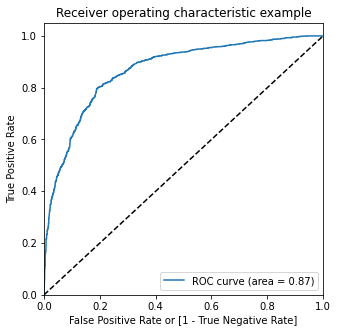

In [116]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The area under the ROC curve is 0.87 which is quite good. So seem to have a good model. LEt's also check sensitivity and specificity tradeoff to find the  optimal cutoff point.

#### Finding the optimal cut-off

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [117]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ProspectID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.210401,2006,0,1,1,1,0,0,0,0,0,0,0
1,0,0.076786,5140,0,1,0,0,0,0,0,0,0,0,0
2,1,0.181218,7588,0,1,1,0,0,0,0,0,0,0,0
3,0,0.361922,5244,0,1,1,1,1,0,0,0,0,0,0
4,0,0.024370,8663,0,1,0,0,0,0,0,0,0,0,0


In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.510712  1.000000  0.000000
0.1   0.1  0.578765  0.989513  0.150032
0.2   0.2  0.706679  0.947563  0.455248
0.3   0.3  0.771267  0.908081  0.628461
0.4   0.4  0.792691  0.847008  0.735995
0.5   0.5  0.790485  0.763726  0.818416
0.6   0.6  0.776307  0.690932  0.865422
0.7   0.7  0.751418  0.605182  0.904057
0.8   0.8  0.708570  0.483035  0.943979
0.9   0.9  0.645243  0.324491  0.980039


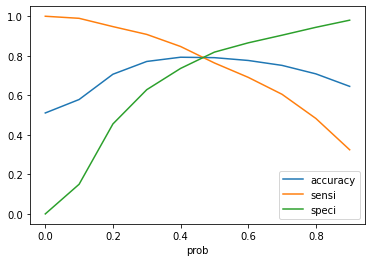

In [119]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, around 0.48 , we get the optimal values of the three metrices. So, let's choose 0.48 as our cutoff no.

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.48 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,ProspectID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.210401,2006,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.076786,5140,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.181218,7588,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.361922,5244,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.024370,8663,0,1,0,0,0,0,0,0,0,0,0,0


#### Assigning Lead Score

In [121]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,ProspectID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.210401,2006,0,1,1,1,0,0,0,0,0,0,0,0,21
1,0,0.076786,5140,0,1,0,0,0,0,0,0,0,0,0,0,8
2,1,0.181218,7588,0,1,1,0,0,0,0,0,0,0,0,0,18
3,0,0.361922,5244,0,1,1,1,1,0,0,0,0,0,0,0,36
4,0,0.024370,8663,0,1,0,0,0,0,0,0,0,0,0,0,2


In [122]:
# Checking if 80% cases are correctly predicted based on converted column.
# Total of final predicted conversion counts from actual converted rates
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted'] == 1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1291
0     330
Name: final_predicted, dtype: int64

In [123]:
# Percentage of final_predicted conversions
1291/float(1291+330)

0.796421961752005

**We can see that final prediction conversions have a target of 80% and we reached 79.6%. That shows it is a good model.**

**Accuracy, Sensitivity and Specificity on Train dataset**

In [124]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8030875866414618

In [125]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1258,  295],
       [ 330, 1291]])

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.796421961752005

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.8100450740502254

### Precision and Recall Metrics of Train Dataset

In [129]:
from sklearn.metrics import precision_score, recall_score

In [130]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8144736842105263

In [131]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7637260950030845

# Step 6: Making Predictions on Test Dataset
Let's now make predictions on the test dataset

In [132]:
# Scale the test dataset as well using just 'transform'

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits', 
                                                                                                              'Total Time Spent on Website', 
                                                                                                              'Page Views Per Visit']])

In [133]:
#Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Other activities,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
8536,0,-1.057823,0,0,0,1,1,0,0,0
945,0,-0.387735,0,0,0,0,1,0,1,0
1550,0,-1.115710,1,0,0,0,1,0,1,0
8570,0,-0.705237,0,0,0,0,0,1,0,1
1410,0,-0.599988,0,0,0,0,1,0,0,0


In [134]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [135]:
# Making predictions on test set

y_test_pred = res.predict(X_test_sm)

In [136]:
y_test_pred[:10]

8536    0.303710
945     0.150792
1550    0.820120
8570    0.985098
1410    0.219351
5664    0.898518
5232    0.093060
6744    0.243373
6924    0.354489
3878    0.238780
dtype: float64

In [137]:
# Converting y_test_pred into dataframe

y_pred1 = pd.DataFrame(y_test_pred)

y_pred1.head()

,0
8536,0.303710
945,0.150792
1550,0.820120
8570,0.985098
1410,0.219351


In [138]:
# Converting y_test into dataframe

y_test_df = pd.DataFrame(y_test)

y_test_df.head()

,Converted
8536,0
945,0
1550,1
8570,1
1410,0


In [139]:
# Adding prospectID to index

y_test_df['ProspectID'] = y_test_df.index

In [140]:
# Removing index from both the dataframes to append using axis=1

y_pred1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [141]:
# Appending y_test_df and y_pred1

y_pred_final = pd.concat([y_test_df, y_pred1], axis=1)

In [142]:
y_pred_final.head()

,Converted,ProspectID,0
0,0,8536,0.303710
1,0,945,0.150792
2,1,1550,0.820120
3,1,8570,0.985098
4,0,1410,0.219351


In [143]:
# Renaming the 3rd column into Converted_prob

y_pred_final = y_pred_final.rename(columns={0:'Converted_prob'})

In [144]:
y_pred_final.head()

,Converted,ProspectID,Converted_prob
0,0,8536,0.303710
1,0,945,0.150792
2,1,1550,0.820120
3,1,8570,0.985098
4,0,1410,0.219351


In [145]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(columns=['ProspectID', 'Converted', 'Converted_prob'])

In [146]:
y_pred_final.head()

,ProspectID,Converted,Converted_prob
0,8536,0,0.303710
1,945,0,0.150792
2,1550,1,0.820120
3,8570,1,0.985098
4,1410,0,0.219351


In [147]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map( lambda x: 1 if x > 0.44 else 0)

y_pred_final.head()

,ProspectID,Converted,Converted_prob,final_predicted
0,8536,0,0.303710,0
1,945,0,0.150792,0
2,1550,1,0.820120,1
3,8570,1,0.985098,1
4,1410,0,0.219351,0


In [148]:
y_pred_final['Lead Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head()

,ProspectID,Converted,Converted_prob,final_predicted,Lead Score
0,8536,0,0.303710,0,30
1,945,0,0.150792,0,15
2,1550,1,0.820120,1,82
3,8570,1,0.985098,1,99
4,1410,0,0.219351,0,22


In [149]:
# Checking if 80% cases are correctly predicted based on converted column.
# Total of final predicted conversion counts from actual converted rates
checking_test_df = y_pred_final.loc[y_pred_final['Converted'] == 1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    558
0    137
Name: final_predicted, dtype: int64

In [150]:
# percentage of final_predicted conversions on test data
558/float(558+137)

0.8028776978417266

Yay!!! Now we can see that final prediction of conversions have a target rate of 80% 

**Accuracy, Sensitivity and Specificity on Test dataset**

In [151]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7876561351947098

In [152]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)

confusion3

array([[514, 152],
       [137, 558]])

#### Metrices Beyond Simple Accuracy

In [153]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8028776978417266

In [155]:
# Let us calculate specificity
TN / float(TN+FP)

0.7717717717717718

#### Precision and Recall Metrics For Test Dataset

In [156]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7859154929577464

In [157]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8028776978417266